In [5]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pyproj
from shapely import geometry
import matplotlib.pyplot as plt
import earthpy

%matplotlib inline

In [2]:
mag_df = pd.read_csv('/home/haxixe/pml_grafita/database/csv/mag_df.csv')
mag_df.head()

,Unnamed: 0,X,Y,MDT,LATITUDE,LONGITUDE,MAGIGRF,MAGMIC,MAGNIV,geometry
0,0,292879.66,7624043.90,609.44,-21.474226,-46.998990,49.882,23113.580,23119.835,POINT (292879.66 7624043.9)
1,1,292879.49,7624052.04,609.53,-21.474153,-46.998991,50.469,23114.171,23120.439,POINT (292879.49 7624052.04)
2,2,292879.32,7624060.18,609.60,-21.474079,-46.998991,50.987,23114.677,23120.958,POINT (292879.32 7624060.18)
3,3,292879.15,7624068.32,609.66,-21.474006,-46.998992,51.473,23115.181,23121.473,POINT (292879.15 7624068.32)
4,4,292878.98,7624076.47,609.71,-21.473932,-46.998993,51.945,23115.658,23121.963,POINT (292878.98 7624076.47)


In [9]:
mag_df['geometry'] = [geometry.Point(x, y) for x, y in zip(mag_df['X'], mag_df['Y'])]

In [10]:
crs ="+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
mag_df = gpd.GeoDataFrame(mag_df, geometry='geometry', crs=crs)
mag_df.head()

,Unnamed: 0,X,Y,MDT,LATITUDE,LONGITUDE,MAGIGRF,MAGMIC,MAGNIV,geometry
0,0,292879.66,7624043.90,609.44,-21.474226,-46.998990,49.882,23113.580,23119.835,POINT (292879.660 7624043.900)
1,1,292879.49,7624052.04,609.53,-21.474153,-46.998991,50.469,23114.171,23120.439,POINT (292879.490 7624052.040)
2,2,292879.32,7624060.18,609.60,-21.474079,-46.998991,50.987,23114.677,23120.958,POINT (292879.320 7624060.180)
3,3,292879.15,7624068.32,609.66,-21.474006,-46.998992,51.473,23115.181,23121.473,POINT (292879.150 7624068.320)
4,4,292878.98,7624076.47,609.71,-21.473932,-46.998993,51.945,23115.658,23121.963,POINT (292878.980 7624076.470)


In [11]:
pg_caconde = gpd.read_file('../database/vectors/pg_area_NW_1105/pg_area_norte1105.shp')
pg_caconde.crs

earthpy.epsg['32723']
pg_caconde.bounds


,minx,miny,maxx,maxy
0,292276.074134,7.564166e+06,345032.438156,7.636970e+06


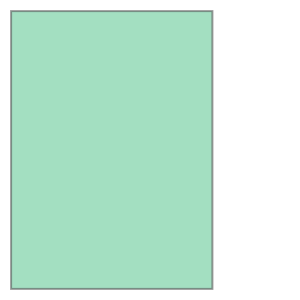

In [12]:
bounds = geometry.Polygon([(292276.074134, 7.636970e+06), (345032.438156, 7.636970e+06), 
                           (345032.438156, 7.564166e+06), (292276.074134, 7.564166e+06)])
area = bounds.area

bounds

In [13]:
cond1 = mag_df.intersects(bounds)
mag_df = mag_df[cond1]

In [14]:
mag_df.to_csv('../database/csv/areas/mag_area_norte.csv')